In [48]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import re

In [9]:
df = pd.read_csv("../data/Results.csv")

Change Yes/No to 1 and 0

In [14]:
df.Fastest = df.Fastest.map(dict(Yes=1, No=0))
df.Cheapest = df.Cheapest.map(dict(Yes=1, No=0))
df.Comfortable = df.Comfortable.map(dict(Yes=1, No=0))
df.OnlyOption = df.OnlyOption.map(dict(Yes=1, No=0))
df.Environmental = df.Environmental.map(dict(Yes=1, No=0))
df.Healthiest = df.Healthiest.map(dict(Yes=1, No=0))
df.OtherTrips = df.OtherTrips.map(dict(Yes=1, No=0))

Change NaN to Empty String

In [25]:
df = df.replace(np.nan, "")

Shorten Center Names

In [49]:
df.Center.str.replace(r".*")

In [40]:
df[df["Center"] == "Barcelona School of Informatics (FIB)"]["GoStage1"].unique()

array(['On foot', 'Bus', 'Renfe', 'Tram',
       'Scooter (or other micro-mobility devices) with renewable charging',
       'Bicycle',
       'Combustion or electric motorcycle with non-renewable source charging',
       'FGC',
       'Combustion vehicle (non-plug-in hybrid, electric or plug-in hybrid with non-renewable source charging),',
       '', 'Underground',
       'Scooter (or other micro-mobility devices) with non-renewable charging'],
      dtype=object)

In [45]:
pt = df.pivot_table(index="Center", columns="GoStage1", aggfunc="count", fill_value=0)["Answer"]
pt

GoStage1,,Bicycle,Bus,Combustion or electric motorcycle with non-renewable source charging,"Combustion vehicle (non-plug-in hybrid, electric or plug-in hybrid with non-renewable source charging),",Electric motorcycle,Electric vehicle (with Zero label and renewable source charging),FGC,On foot,Renfe,Scooter (or other micro-mobility devices) with non-renewable charging,Scooter (or other micro-mobility devices) with renewable charging,Taxi,Tram,Underground
Center,,,,,,,,,,,,,,,
Barcelona School of Informatics (FIB),6,7,30,10,15,0,0,4,75,11,2,3,0,4,24
Faculty of Mathematics and Statistics (FME),0,1,6,1,0,0,0,0,25,2,0,0,0,2,6
Faculty of Nautical of Barcelona (FNB),2,4,2,5,0,0,0,1,12,0,0,1,0,0,4
Faculty of Optics and Optometry of Terrassa (FOOT),2,0,2,1,4,0,0,1,11,1,0,0,0,0,3
Higher Technical School of Architecture of Barcelona (ETSAB),6,6,11,7,5,0,1,4,53,3,0,1,0,3,15
"Higher Technical School of Engineering of Roads, Canals and Ports of Barcelona (ETSECCPB)",6,5,10,7,3,0,1,1,38,2,0,0,0,6,9
Higher Technical School of Industrial Engineering of Barcelona (ETSEIB),7,9,18,22,10,1,1,2,68,5,0,2,0,5,24
Higher Technical School of Telecommunications Engineering of Barcelona (ETSETB),2,3,14,2,4,0,1,4,33,2,2,0,0,2,13
Polytechnic School of Engineering of Manresa (EPSEM),5,0,4,3,22,0,1,1,24,1,0,0,0,0,0


<AxesSubplot:xlabel='GoStage1', ylabel='Center'>

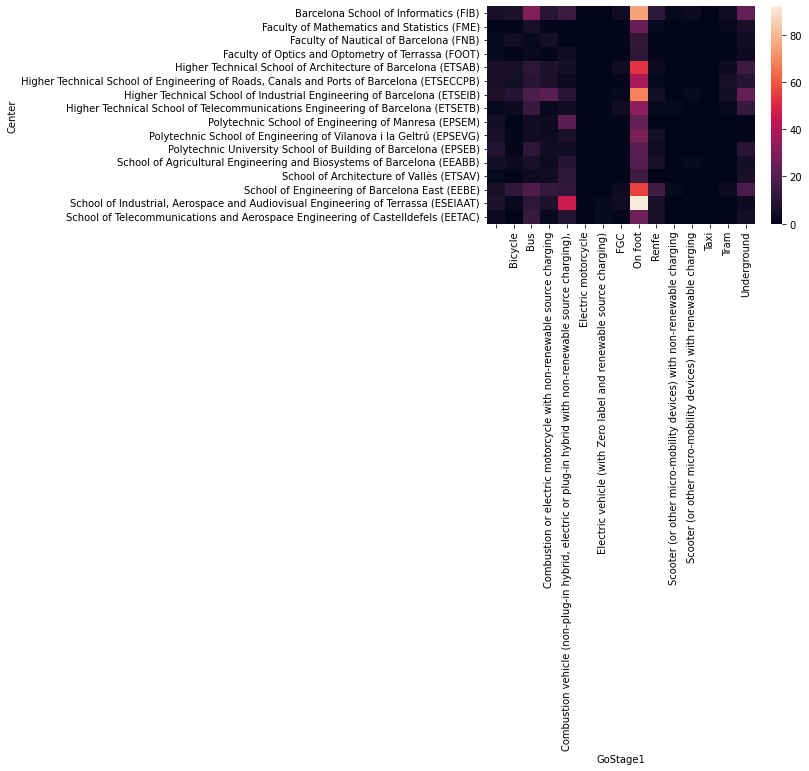

In [46]:
sns.heatmap(pt)